In [61]:
import os
import pandas as pd
from fred import Fred
import matplotlib.pyplot as plt

%matplotlib inline

# Get data

In [62]:
# fr = Fred(api_key='abcdefghijklmnopqrstuvwxyz123456',response_type='dict')

- Can see if we can use API to get data

### Gross Output by Industry

In [63]:
data_dir = os.path.join(os.getcwd(), "data/covideco_Quarterly.txt")

In [64]:
go_by_industry = pd.read_csv(data_dir,sep="\t")

**Notes:**
- Data Source: Gross Output by Industry: Gross Output by Industry, Billions of Dollars, Seasonally Adjusted at Annual Rates
https://fred.stlouisfed.org/release/tables?rid=331&eid=1993#



# Initial Analysis

In [65]:
go_by_industry.shape

(59, 33)

In [66]:
go_by_industry.DATE.max()

'2019-07-01'

In [67]:
go_by_industry.DATE.min()

'2005-01-01'

In [68]:
go_by_industry.columns

Index(['DATE', 'GOAER', 'GOAERAF', 'GOAF', 'GOAFH', 'GOAI', 'GOAWMS', 'GOC',
       'GOES', 'GOESHS', 'GOF', 'GOFI', 'GOFIRL', 'GOG', 'GOGPI', 'GOHCSA',
       'GOI', 'GOM', 'GOMA', 'GOMCE', 'GOMD', 'GOMN', 'GOOSEG', 'GOPBS',
       'GOPI', 'GOPST', 'GOR', 'GORL', 'GOSL', 'GOSPI', 'GOT', 'GOU', 'GOW'],
      dtype='object')

In [69]:
go_by_industry.head()

,DATE,GOAER,GOAERAF,GOAF,GOAFH,GOAI,GOAWMS,GOC,GOES,GOESHS,...,GOPBS,GOPI,GOPST,GOR,GORL,GOSL,GOSPI,GOT,GOU,GOW
0,2005-01-01,195200,830300,635099,297482,22835859,559735,1238713,191383,1544232,...,2214244,20263503,1310749,1218101,2414652,1731382,13713477,724612,381224,1087905
1,2005-04-01,199654,850167,650513,298167,23225964,576804,1269902,193184,1564898,...,2261537,20629694,1335294,1233556,2479923,1753076,13956891,744427,393619,1091728
2,2005-07-01,203031,861411,658379,299068,23733860,583213,1302808,196086,1593299,...,2294539,21091301,1350535,1248641,2534816,1782789,14260921,762510,433039,1106462
3,2005-10-01,210163,878097,667933,299297,24256100,601280,1337151,199854,1614902,...,2354618,21574195,1388096,1258552,2562990,1814950,14490669,778906,456852,1144844
4,2006-01-01,216256,899096,682840,295945,24604791,615663,1371165,205626,1639224,...,2394078,21868521,1406098,1294025,2586824,1836871,14731273,804842,428646,1169017


**Notes:**

- Private Industries: 
    - `GOAFH`: Agriculture, Forestry, Fishing, and Hunting 
    - `GOM`: Mining
    - `GOU`: Utilities
    - `GOC`: Construction
    - Manufacturing:
        - `GOMD`: Durable Goods
        - `GOMN`: Nondurable Goods
    - `GOW`: Wholesale Trade
    - `GOR`: Retail Trade
    - `GOT`: Transportation and Warehousing
    - `GOI`: Information
    - `GOFIRL`: Finance, Insurance, Real Estate, Rental, and Leasing
        - `GOFI`: Finance and Insurance
        - `GORL`: Real Estate and Rental and Leasing
    - `GOPBS`: Professional and Business Services
        - `GOPST`: Professional, Scientific, and Technical Services
        - `GOMCE`: Management of Companies and Enterprises
        - `GOAWMS`: Administrative and Waste Management Services
    - `GOESHS`: Educational Services, Health Care,and Social Assistance
        - `GOES`: Educational Services
        - `GOHCSA`: Health Care and Social Assistance
    - `GOAERAF`: Arts, Entertainment, Recreation, Accommodation, and Food Services 
        - `GOAER`: Arts, Entertainment, and Recreation
        - `GOAF`: Accommodation and Food Services
    - `GOOSEG`: Other Services, Except Government
- `GOG`: Government
    - `GOF`: Federal
    - `GOSL`: State and Local
- Addenda:
    - `GOSPI`: Gross Output of Private Services-Producing Industries




- `GOAI`: Gross Output of All Industries


**Categories**
- private industry: `GOAFH`, `GOM`, `GOU`, `GOC`, `GOMD`, `GOMN`, `GOW`, `GOR`, `GOT`, `GOI`, `GOFI`, `GORL`, `GOPST`, `GOMCE`, `GOAWMS`, `GOES`, `GOHCSA`, `GOAER`, `GOAF`, `GOOSEG`


In [70]:
private_ind = ['GOAFH', 'GOM', 'GOU', 
               'GOC', 'GOMD', 'GOMN',
               'GOW', 'GOR', 'GOT',
               'GOI', 'GOFI', 'GORL',
               'GOPST', 'GOMCE', 'GOAWMS', 
               'GOES', 'GOHCSA', 'GOAER',
               'GOAF', 'GOOSEG']

In [71]:
go_by_industry.dtypes[:5]

DATE       object
GOAER       int64
GOAERAF     int64
GOAF        int64
GOAFH       int64
dtype: object

In [72]:
go_by_industry['DATE'] = pd.to_datetime(go_by_industry['DATE'])

In [73]:
go_by_industry = go_by_industry.set_index('DATE')

In [74]:
test_cols = ['GOHCSA','GOAERAF','GOT','GOR','GOAFH','GOFI']

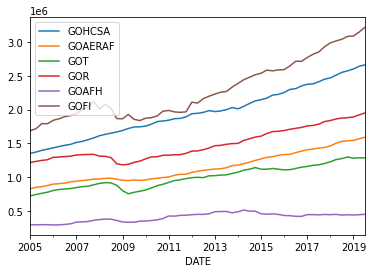

In [75]:
go_by_industry[test_cols].plot()

In [76]:
go_private_ind = go_by_industry[private_ind]

In [83]:
go_private_ind = go_private_ind.reset_index()

In [84]:
go_private_ind['year'] = go_private_ind['DATE'].dt.year

In [87]:
go_private_ind['quarter'] = go_private_ind['DATE'].dt.quarter

In [106]:
go_private_ind_1st_qt = go_private_ind[go_private_ind.quarter == 1]

In [107]:
go_private_ind_1st_qt = go_private_ind_1st_qt.drop(columns=['DATE'])

In [108]:
go_private_ind_1st_qt = go_private_ind_1st_qt.drop(columns=['quarter'])

In [110]:
go_private_ind_1st_qt = go_private_ind_1st_qt.set_index(['year'])

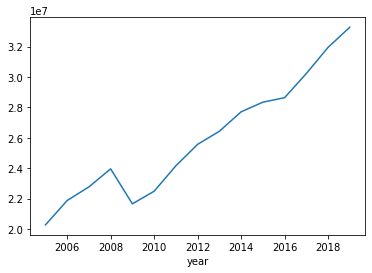

In [111]:
fig,ax = plt.subplots()
go_private_ind_1st_qt.sum(axis=1).plot()


**Notes:**
- We want to see how GDP would change in terms of Quartine times.
- Need to have a model to esimate cases change gaven quartine time
- and then to research on which industries would be most affected by quatentine, adjust growth in GDP 